## Building An RFM Model in Python

 Companies have spent a lot of money on market research, but with technology changing customers’ behaviour and research methodologies all the time, there is a need for constant improvements. The Marketing team have long recognized the significance of customer orientation, since knowing, serving, and influencing consumers is critical to accomplishing marketing goals and objectives.

Customer segmentation has the ability to help company’s marketers and individual marketers reach out to each customer in the most efficient way possible. A customer segmentation study uses the enormous amount of data available on customers (and future customers) to identify distinct groups of consumers with a high degree of accuracy based on demographic, behavioural, and other factors.

 RFM segmentation enables marketers to target specific groups of consumers with communications that are far more relevant to their individual behaviours, resulting in much greater response rates and improved loyalty and customer lifetime value. RFM segmentation, like other segmentation approaches, is an effective tool to identify groups of consumers who should be treated differently. RFM stands for recency, frequency, and monetary

### There are several approaches to segmentation. However, I chose RFM Model for the following reasons:

1. It employs objective numerical scales to produce a high-level picture of consumers that is both succinct and instructive.
2. It’s simple enough that marketers can utilize it without expensive tools.
3. It’s simple — the segmentation method’s output is simple to comprehend and analyze.


## Basis

 For this project, I will be building an RFM (Recency Frequency Monetary) model using an FMCG data set I downloaded on Kaggle just for the sake of this project( I know someone must have put it out there for free use, a big thank you to the anonymous). I am sure there are countless free data sets you can get on Kaggle for practice as well.

## Intended Outcome

 The purpose of this project is to build an RFM model that segments customers into sections listed below:

* Can\’t Loose Them’
* Champions
* Loyal/Committed
* Requires Attention
* Potential
* Promising
* Demands Activation
#### So, Let’s get started right away

## Step 1: Importing Required Libraries:

Before getting started let’s import libraries needed for the project using the python scripts below:

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
FCMG_data = pd.read_excel(r'online_retail_II.xlsx', sheet_name='Year 2010-2011')
FCMG_data.shape

(541910, 8)

### Variables Descriptions:
• InvoiceNo: Invoice Number -> If this code starts with C, it means that the operation has been canceled.

• StockCode: Product Code -> Unique number for each product

• Description: Product name

• Quantity: Number of products -> how many of the products on the invoices were sold.

• InvoiceDate

• UnitePrice

• CustomerID: Unique customer number

• Country

## Step 2: Explorative Data Analysis (EDA):

I consider this step sacred and important in all data science projects. Performing a detailed EDA helps you understand your data and know the best approach to tackling any project. You will get to know the missing values, correlating features and identify other trends present in the data set. Below is what the FMCG data sets look like:

In [ ]:
FCMG_data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
FCMG_data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


Now that we have our data in a suitable environment, It's often a great idea to take a look at the first samples(just to describe what our data looks like). This dataset is used to analyze merchant behaviour. Here are a few details about the features:

* Invoice No: This is a unique number generated by this FMCG store to help trace payment details.
* StockCode: This is a unique number assigned to each product in a particular category to help in stock keeping/tracking purposes.
* Description: This explains the product’s why and provides information about the products.
* Quantity: This gives the number of products purchased.
* InvoiceDate: This represents the time stamp (time and date) on which the invoice has been billed and the transaction officially recorded.
* UnitPrice: This refers to the price of each product.
* CustomerID: This refers to the unique number assigned to each customer.
* Country: This refers to the country in which the purchase is being made.



One question that should come to mind is “What is the unique identifier of each row in the data?” A unique identifier can be a column or set of columns that is guaranteed to be unique across rows in your dataset. This is key for differentiating rows and referencing them in our EDA. For this FMCG data set, we will be using for this project the CustomerID is the key.

### Step 3: Data Preprocessing

Here, we have our data ready and will be performing some basic pre-processing on the data sets

* We’ll be using the Python Script below to convert the InvoiceDate Feature from Object format to DateTime format.

In [ ]:
# Convert InvoiceDate from object to datetime format
FCMG_data['InvoiceDate'] = pd.to_datetime(FCMG_data['InvoiceDate'])

In [ ]:
missing_values_count = FCMG_data.isnull().sum()

print(missing_values_count[missing_values_count > 0])

Description      1454
Customer ID    135080
dtype: int64


In [ ]:
print('{:,} rows; {:,} columns'
      .format(FCMG_data.shape[0], FCMG_data.shape[1]))
print('{:,} transactions don\'t have a customer id'.format(FCMG_data[FCMG_data['Customer ID'].isnull()].shape[0]))
print('Transactions timeframe from {} to {}'.format(FCMG_data['InvoiceDate'].min(),FCMG_data['InvoiceDate'].max()))

541,910 rows; 8 columns
135,080 transactions don't have a customer id
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [ ]:
# Drop NA values from FCMG_data
FCMG_data.dropna()

We create a new column TotalSum column with the Python Script below:

In [ ]:
# Create TotalSum column for online dataset
FCMG_data['TotalSum'] = FCMG_data['Quantity'] * FCMG_data['Price']

We then create a snapshot of the date, using our FCMG_data with the Python Script below:


In [ ]:
# Create snapshot date
snapshot_date = FCMG_data['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


We can group customerID after creating the snapshot date using the python script below

In [ ]:
# Grouping by CustomerID
FMCG_Preprocess = FCMG_data.groupby(['Customer ID']).agg({
        'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
        'Invoice': 'count',
        'TotalSum': 'sum'})

we proceed to rename our features — columns (InvoiceDate, InvoiceNo,TotalSum) with Recency, Frequency and Monetary respectively but just before that, lets define some terms:

* Recency: The more recently a customer has interacted or transacted with a brand. How long has it been since a customer engaged in an activity or made a purchase with the brand? The most common activity is a purchase for an FMCG store, though other examples include the most recent visit to a website or the use of a mobile app for other scenarios/industries.
* Frequency: During a given time period, how many times has a consumer transacted or interacted with the brand? Customers who participate in activities regularly are clearly more involved and loyal than those who do so infrequently. it answers the question, how often?
* Monetary: This factor, also known as “monetary value,” reflects how much a customer has spent with the brand over a given period of time. Those who spend a lot of money should be handled differently from customers who spend a little. The average purchase amount is calculated by dividing monetary by frequency, which is a significant secondary element to consider when segmenting customers.


Now we can relate the relationship between (InvoiceDate & Recency, InvoiceNo & Frequency, TotalSum & Monetary) .

In [ ]:
# Rename the columns 
FMCG_Preprocess.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

we can explore the rows and shape of the data frame using the python scripts below:

In [ ]:
# Print top 5 rows and shape of dataframe
print(FMCG_Preprocess.head())
print('{:,} rows; {:,} columns'
      .format(FMCG_Preprocess.shape[0], FMCG_Preprocess.shape[1]))

             Recency  Frequency  MonetaryValue
Customer ID                                   
12346.0          326          2           0.00
12347.0            2        182        4310.00
12348.0           75         31        1797.24
12349.0           19         73        1757.55
12350.0          310         17         334.40
4,372 rows; 3 columns


We can plot the distribution using the Python Script below:


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

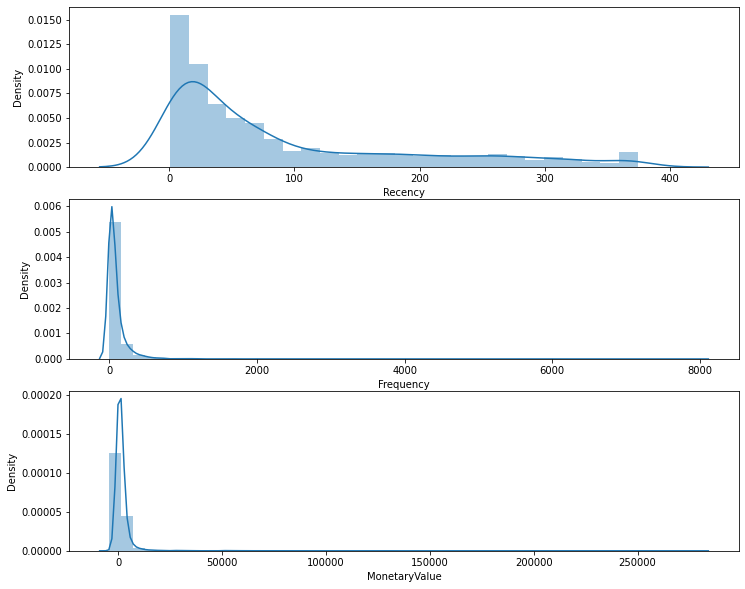

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(FMCG_Preprocess['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(FMCG_Preprocess['Frequency'])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(FMCG_Preprocess['MonetaryValue'])
# Show the plot
plt.show()

### Step 4: Building the RFM Groups

* We’ll be Calculating the R,F and M groups,
* Creating labels for Recency, Frequency and Monetary Value,
* Assigning labels created to 4 equal percentile groups,
* Then create new columns R, F and M.


Here, is the python script to create the RFM Groups below:

In [ ]:
#Calculating R and F groups
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 5)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(FMCG_Preprocess['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(FMCG_Preprocess['Frequency'], q=4, labels=f_labels)
# Create new columns R and F 
FMCG_Preprocess = FMCG_Preprocess.assign(R = r_groups.values, F = f_groups.values)
FMCG_Preprocess.head()

,Recency,Frequency,MonetaryValue,R,F
Customer ID,,,,,
12346.0,326,2,0.00,1,1
12347.0,2,182,4310.00,4,4
12348.0,75,31,1797.24,2,2
12349.0,19,73,1757.55,3,3
12350.0,310,17,334.40,1,1


In [ ]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(FMCG_Preprocess['MonetaryValue'], q=4, labels=m_labels)
# Create new column M
FMCG_Preprocess = FMCG_Preprocess.assign(M = m_groups.values)
FMCG_Preprocess.head()

,Recency,Frequency,MonetaryValue,R,F,M
Customer ID,,,,,,
12346.0,326,2,0.00,1,1,1
12347.0,2,182,4310.00,4,4,4
12348.0,75,31,1797.24,2,2,4
12349.0,19,73,1757.55,3,3,4
12350.0,310,17,334.40,1,1,2


### Step 5: Building the RFM Model

We have to concatenate the RFM quartile values to create RFM segments using the python scripts below:

In [ ]:
# Concating the RFM quartile values to create RFM Segments
def join_rfm(x): 
  return str(x['R']) + str(x['F']) + str(x['M'])
FMCG_Preprocess['RFM_Segment_Concat'] = FMCG_Preprocess.apply(join_rfm, axis=1)
FMCG_rfm = FMCG_Preprocess
FMCG_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat
Customer ID,,,,,,,
12346.0,326,2,0.00,1,1,1,111
12347.0,2,182,4310.00,4,4,4,444
12348.0,75,31,1797.24,2,2,4,224
12349.0,19,73,1757.55,3,3,4,334
12350.0,310,17,334.40,1,1,2,112


* Now let's count the number of unique segments
* Then Calculate the RFM score with the python scripts below.

In [ ]:
# Count num of unique segments
FMCG_rfm_count_unique = FMCG_rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print(FMCG_rfm_count_unique.sum())

62


In [ ]:
# Calculate RFM_Score
FMCG_rfm['RFM_Score'] = FMCG_rfm[['R','F','M']].sum(axis=1)
print(FMCG_rfm['RFM_Score'].head())

Customer ID
12346.0     3
12347.0    12
12348.0     8
12349.0    10
12350.0     4
Name: RFM_Score, dtype: int64


Here we have already calculated the RFM Score of each customer and we have the data frame of the RFM score as below:

* Then we create a conditional Statement using the python scripts below to segment Customers (by customerID column) as either Can’t Lose Them, or Champions, or Loyal/Committed, or Potential, or Promising, or Requires attention or Demands Activation:

In [ ]:
# Define FMCG_rfm_level function
def FMCG_rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal/Commited'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Promising'
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Requires Attention'
    else:
        return 'Demands Activation'
# Create a new variable RFM_Level
FMCG_rfm['RFM_Level'] = FMCG_rfm.apply(FMCG_rfm_level, axis=1)
# Printing the header with top 15 rows 
FMCG_rfm.head(15)

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
Customer ID,,,,,,,,,
12346.0,326,2,0.00,1,1,1,111,3,Demands Activation
12347.0,2,182,4310.00,4,4,4,444,12,Can't Loose Them
12348.0,75,31,1797.24,2,2,4,224,8,Champions
12349.0,19,73,1757.55,3,3,4,334,10,Can't Loose Them
12350.0,310,17,334.40,1,1,2,112,4,Requires Attention
12352.0,36,95,1545.41,3,3,3,333,9,Can't Loose Them
12353.0,204,4,89.00,1,1,1,111,3,Demands Activation
12354.0,232,58,1079.40,1,3,3,133,7,Loyal/Commited
12355.0,214,13,459.40,1,1,2,112,4,Requires Attention


* Calculating the average values for each RFM_Level, and return a size of each segment using the python script below:


In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
FMCG_rfm_level_agg = FMCG_rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(FMCG_rfm_level_agg)

#We have a Pandas Data frame Showing the Calculated values for each RFM_Level of each customer in the data frame below as:

                   Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Level                                               
Can't Loose Them      25.2     195.1        4130.3  1690
Champions             62.7      57.0         974.7   467
Demands Activation   264.8       7.8         109.1   392
Loyal/Commited        78.8      39.7         724.2   447
Potential             94.3      28.5         491.8   468
Promising            153.0      21.2         346.8   517
Requires Attention   174.5      13.9         227.1   391


### Step 6: The Data Visualization of Customers Segmented Using the RFM Model

1. Squarify library: I chose Squarify because,squarify library is built on top of Matplotlib, and it uses space efficiently.
2. Plotting the RFM level on the Squarify plot using the Python Script below:

In [ ]:
!pip install --q squarify

In [ ]:
import squarify

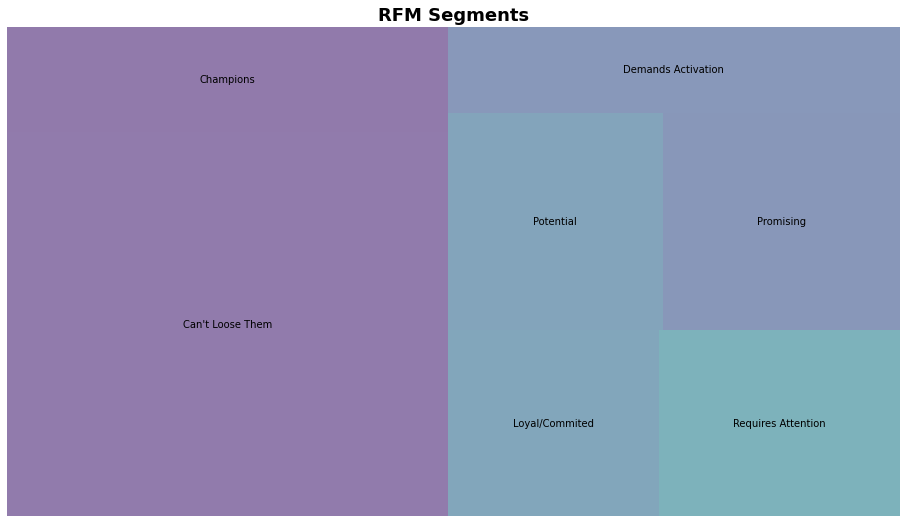

In [ ]:
FMCG_rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=FMCG_rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal/Commited',
                     'Requires Attention',
                     'Potential', 
                     'Promising', 
                     'Demands Activation'], alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

Here we have our final dashboard showing how we’ve segmented customers using the RFM Model